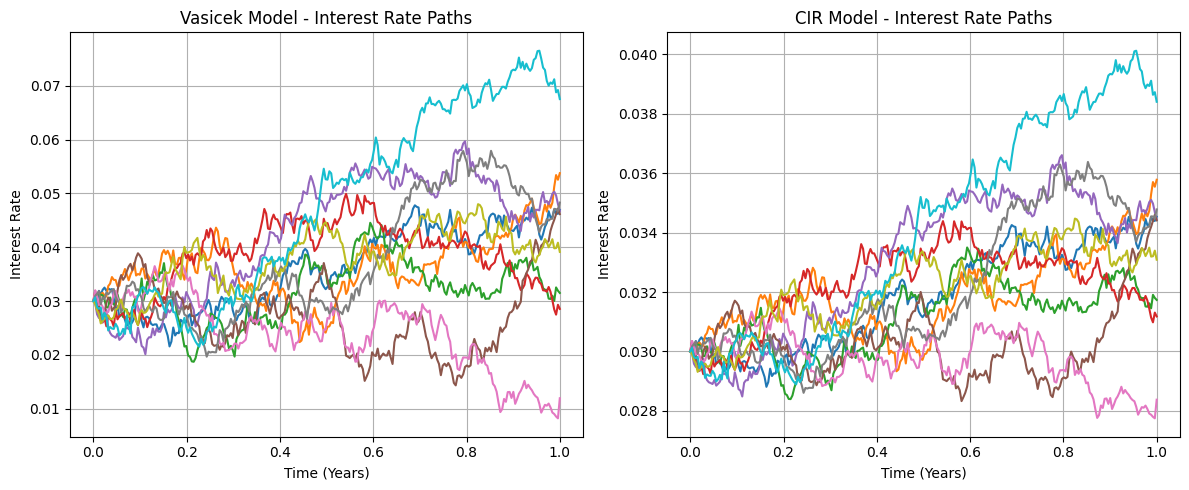

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Model Parameters
alpha = 0.1   # Speed of mean reversion
theta = 0.05  # Long-term mean interest rate
sigma = 0.02  # Volatility
r0 = 0.03     # Initial short rate
T = 1.0       # Time horizon (1 year)
dt = 1/252    # Time step (daily)
N = int(T / dt)  # Number of time steps
n_paths = 10   # Number of simulation paths

# Function to Simulate Vasicek Model
def simulate_vasicek(alpha, theta, sigma, r0, T, dt, N, n_paths):
    np.random.seed(42)
    r_vasicek = np.zeros((N, n_paths))
    r_vasicek[0, :] = r0

    for t in range(1, N):
        dW = np.random.randn(n_paths) * np.sqrt(dt)  # Brownian motion
        r_vasicek[t, :] = r_vasicek[t-1, :] + alpha * (theta - r_vasicek[t-1, :]) * dt + sigma * dW

    return r_vasicek

# Function to Simulate CIR Model
def simulate_cir(alpha, theta, sigma, r0, T, dt, N, n_paths):
    np.random.seed(42)
    r_cir = np.zeros((N, n_paths))
    r_cir[0, :] = r0

    for t in range(1, N):
        dW = np.random.randn(n_paths) * np.sqrt(dt)
        r_cir[t, :] = np.maximum(0, r_cir[t-1, :] + alpha * (theta - r_cir[t-1, :]) * dt + sigma * np.sqrt(r_cir[t-1, :]) * dW)

    return r_cir

# Run simulations
r_vasicek = simulate_vasicek(alpha, theta, sigma, r0, T, dt, N, n_paths)
r_cir = simulate_cir(alpha, theta, sigma, r0, T, dt, N, n_paths)

# Plot results
time_grid = np.linspace(0, T, N)

plt.figure(figsize=(12, 5))

# Vasicek Model Plot
plt.subplot(1, 2, 1)
plt.plot(time_grid, r_vasicek)
plt.title("Vasicek Model - Interest Rate Paths")
plt.xlabel("Time (Years)")
plt.ylabel("Interest Rate")
plt.grid()

# CIR Model Plot
plt.subplot(1, 2, 2)
plt.plot(time_grid, r_cir)
plt.title("CIR Model - Interest Rate Paths")
plt.xlabel("Time (Years)")
plt.ylabel("Interest Rate")
plt.grid()

plt.tight_layout()
plt.show()
